In [5]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [6]:
sns.set()

In [7]:
df= pd.read_csv('heart.csv')

In [8]:
df = df.head(918)


In [9]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [10]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [11]:
X = df[['Age', 'Sex','ChestPainType', 'RestingBP' ,'Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope']]

In [12]:
X.shape

(918, 11)

In [13]:
y=df['HeartDisease']

In [14]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat


<AxesSubplot:>

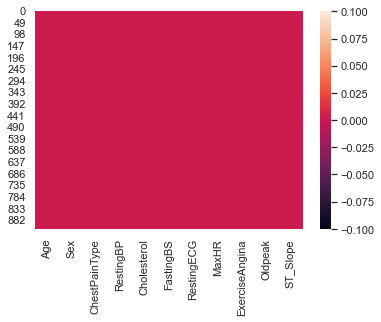

In [15]:
sns.heatmap(X.isnull()) # to check the null areas in dset.

/opt/homebrew/Caskroom/miniforge/base/envs/tf2/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FastingBS', ylabel='count'>

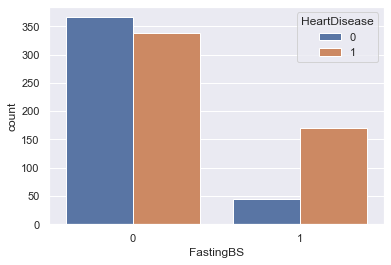

In [16]:
sns.countplot(X['FastingBS'], hue = y)

/opt/homebrew/Caskroom/miniforge/base/envs/tf2/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ST_Slope', ylabel='count'>

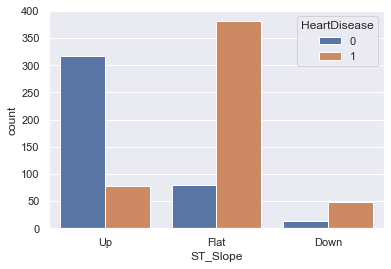

In [17]:
sns.countplot(X['ST_Slope'], hue = y) 

/opt/homebrew/Caskroom/miniforge/base/envs/tf2/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ChestPainType', ylabel='count'>

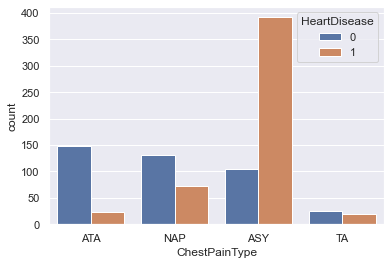

In [18]:
sns.countplot(df['ChestPainType'], hue = df['HeartDisease']) 
#we can see that TA and NAP are not that helpful features so we can remove them after making columns.

/opt/homebrew/Caskroom/miniforge/base/envs/tf2/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

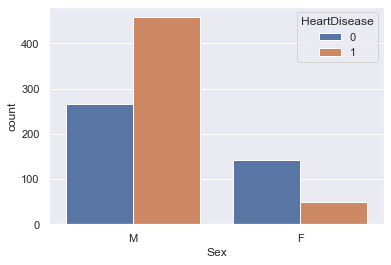

In [19]:
sns.countplot(X['Sex'], hue = y) 
#girls(0) in the dataset have low chances of having disease an boys have more as it can be identified by graphs so it is valid feature.

#### ENCODING THE CATEGORICAL VALUES INTO INT 

In [20]:
le = LabelEncoder()

In [21]:
chest =le.fit_transform(X['ChestPainType'])

In [22]:
chest

array([1, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 1, 1, 0, 2, 1, 0, 1, 0, 1, 3, 1,
       1, 1, 2, 2, 0, 1, 1, 1, 2, 2, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 1, 2,
       0, 2, 0, 1, 2, 0, 0, 0, 1, 1, 0, 1, 0, 2, 0, 0, 1, 2, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 1, 0, 2, 1, 0, 1, 0, 0, 0, 1,
       3, 0, 1, 0, 1, 0, 2, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 2, 0, 0, 0, 3, 3, 2, 2, 0, 1, 1, 1, 1, 0, 1, 2, 2, 0,
       0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 3, 0, 1, 0, 2, 1, 2, 1, 2, 0, 0,
       0, 1, 2, 0, 0, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 1, 1, 2, 1, 3, 0, 1,
       0, 3, 3, 2, 2, 1, 1, 0, 1, 1, 1, 0, 0, 2, 2, 2, 0, 3, 0, 2, 1, 1,
       0, 0, 2, 2, 1, 0, 2, 0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 3, 0, 0, 1, 0,
       1, 1, 0, 3, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 2, 1, 1, 1, 0, 0,
       2, 1, 0, 1, 0, 2, 0, 1, 0, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 0, 2,
       0, 1, 1, 1, 2, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0,

In [23]:
 X['ChestPainType'] = chest

/var/folders/xb/gf4tl3zx16vcxy697lhj0sy40000gn/T/ipykernel_15415/265573615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ChestPainType'] = chest


In [24]:
#cp = pd.get_dummies(df.ChestPainType)  #for concatenating to prev dataset in form of columns.

In [25]:
#cp

In [26]:
#cp = cp.head(918)

In [27]:
#cp.shape

In [28]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,1,140,289,0,Normal,172,N,0.0,Up
1,49,F,2,160,180,0,Normal,156,N,1.0,Flat
2,37,M,1,130,283,0,ST,98,N,0.0,Up
3,48,F,0,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,2,150,195,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,3,110,264,0,Normal,132,N,1.2,Flat
914,68,M,0,144,193,1,Normal,141,N,3.4,Flat
915,57,M,0,130,131,0,Normal,115,Y,1.2,Flat
916,57,F,1,130,236,0,LVH,174,N,0.0,Flat


In [29]:
#x.shape

In [30]:
#X = pd.concat([x , cp],True)

In [31]:
#X.shape

In [32]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [33]:
df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [34]:
X['Sex']

0      M
1      F
2      M
3      F
4      M
      ..
913    M
914    M
915    M
916    F
917    M
Name: Sex, Length: 918, dtype: object

In [35]:
sex = le.fit_transform(X['Sex'])

In [36]:
X['Sex'] = sex

/var/folders/xb/gf4tl3zx16vcxy697lhj0sy40000gn/T/ipykernel_15415/1376592387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = sex


In [37]:
recg = le.fit_transform(X['RestingECG'])

In [38]:
recg.dtype

dtype('int64')

In [39]:
recg= recg.reshape(-1,1)

In [40]:
RestingECG = recg

In [41]:
Slope = le.fit_transform(X['ST_Slope'])
X['ST_Slope'] = Slope



/var/folders/xb/gf4tl3zx16vcxy697lhj0sy40000gn/T/ipykernel_15415/2192688529.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ST_Slope'] = Slope


In [42]:
Exercise = le.fit_transform(X['ExerciseAngina'])
ExerciseAngina = Exercise
X['ExerciseAngina']= ExerciseAngina

/var/folders/xb/gf4tl3zx16vcxy697lhj0sy40000gn/T/ipykernel_15415/2330561351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ExerciseAngina']= ExerciseAngina


In [43]:
 RestingECG

array([[1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [2],
       [2],
       [1],
       [1],
       [2],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [2],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [44]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,Normal,172,0,0.0,2
1,49,0,2,160,180,0,Normal,156,0,1.0,1
2,37,1,1,130,283,0,ST,98,0,0.0,2
3,48,0,0,138,214,0,Normal,108,1,1.5,1
4,54,1,2,150,195,0,Normal,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,Normal,132,0,1.2,1
914,68,1,0,144,193,1,Normal,141,0,3.4,1
915,57,1,0,130,131,0,Normal,115,1,1.2,1
916,57,0,1,130,236,0,LVH,174,0,0.0,1


In [45]:
X.dtypes

Age                 int64
Sex                 int64
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
dtype: object

In [46]:
y.dtype

dtype('int64')

In [47]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,Normal,172,0,0.0,2
1,49,0,2,160,180,0,Normal,156,0,1.0,1
2,37,1,1,130,283,0,ST,98,0,0.0,2
3,48,0,0,138,214,0,Normal,108,1,1.5,1
4,54,1,2,150,195,0,Normal,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,Normal,132,0,1.2,1
914,68,1,0,144,193,1,Normal,141,0,3.4,1
915,57,1,0,130,131,0,Normal,115,1,1.2,1
916,57,0,1,130,236,0,LVH,174,0,0.0,1


In [48]:
#X= X.drop('TA' , axis = 1)
#X = X.drop('NAP' , axis = 1)  
#in case of dummies

In [49]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,Normal,172,0,0.0,2
1,49,0,2,160,180,0,Normal,156,0,1.0,1
2,37,1,1,130,283,0,ST,98,0,0.0,2
3,48,0,0,138,214,0,Normal,108,1,1.5,1
4,54,1,2,150,195,0,Normal,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,Normal,132,0,1.2,1
914,68,1,0,144,193,1,Normal,141,0,3.4,1
915,57,1,0,130,131,0,Normal,115,1,1.2,1
916,57,0,1,130,236,0,LVH,174,0,0.0,1


hence above in X , ST_Slope also plays a major role in identifying heart disease so this is also a valid feature.

In [50]:
k= pd.crosstab(X['Sex'], y)

<AxesSubplot:xlabel='Sex'>

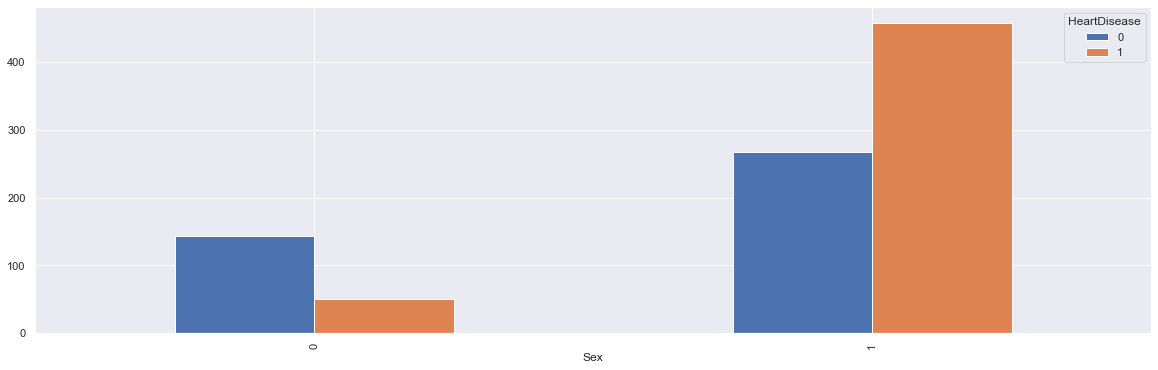

In [51]:
k.plot(kind="bar",figsize=(20,6))

Text(0, 0.5, 'Cholesterol')

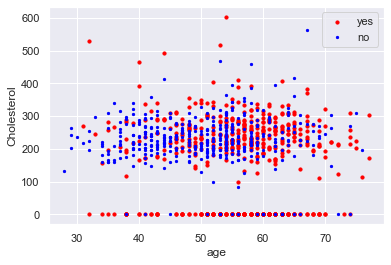

In [52]:
plt.scatter(x=X.Age[y==1], y=X.Cholesterol[(y==1)], c="red", s=10)
plt.scatter(x=X.Age[y==0], y=X.Cholesterol[(y==0)], c="blue", s=5)
plt.legend(['yes', 'no'])
plt.xlabel("age")
plt.ylabel("Cholesterol")

In [53]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,Normal,172,0,0.0,2
1,49,0,2,160,180,0,Normal,156,0,1.0,1
2,37,1,1,130,283,0,ST,98,0,0.0,2
3,48,0,0,138,214,0,Normal,108,1,1.5,1
4,54,1,2,150,195,0,Normal,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,Normal,132,0,1.2,1
914,68,1,0,144,193,1,Normal,141,0,3.4,1
915,57,1,0,130,131,0,Normal,115,1,1.2,1
916,57,0,1,130,236,0,LVH,174,0,0.0,1


In [54]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,Normal,172,0,0.0,2
1,49,0,2,160,180,0,Normal,156,0,1.0,1
2,37,1,1,130,283,0,ST,98,0,0.0,2
3,48,0,0,138,214,0,Normal,108,1,1.5,1
4,54,1,2,150,195,0,Normal,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,Normal,132,0,1.2,1
914,68,1,0,144,193,1,Normal,141,0,3.4,1
915,57,1,0,130,131,0,Normal,115,1,1.2,1
916,57,0,1,130,236,0,LVH,174,0,0.0,1


In [55]:
xTrain,xTest,yTrain,yTest = train_test_split(X,y , test_size = 0.30)

In [56]:
model = LogisticRegression()

In [57]:
model.fit(xTrain,yTrain)

ValueError: could not convert string to float: 'Normal'

In [58]:
model.coef_ # weights

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [59]:
model.intercept_  

AttributeError: 'LogisticRegression' object has no attribute 'intercept_'

In [60]:
X.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')

In [61]:
yPred = model.predict(xTest)

ValueError: could not convert string to float: 'ST'

In [62]:
yPred

NameError: name 'yPred' is not defined

In [63]:
yTest

248    1
285    0
828    1
154    0
428    1
      ..
441    1
613    0
686    0
462    1
72     1
Name: HeartDisease, Length: 276, dtype: int64

In [64]:
from sklearn import metrics

In [65]:
metrics.mean_absolute_error(yTest, yPred) 
#to be minimized . last : 0.1594( when TA and NAP was removed ) 0.166(when TA and and NAP are Included)

NameError: name 'yPred' is not defined

In [66]:
yPred

NameError: name 'yPred' is not defined

In [67]:
yTest.value_counts()

1    161
0    115
Name: HeartDisease, dtype: int64

In [68]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [69]:
confusion_matrix(yPred,yTest) 
#88 Model predicted Right. TP
#28: Model predicted 1 but the test value is 0. FN
#25: Model predicted 0 but the test value is 1. FP
#135: Neither model predicted 0 nor test values are 0. TN

NameError: name 'yPred' is not defined

after  graphically feature selection, we can see the difference between the prev result and current result. 

In [70]:
accuracy_score(yPred, yTest)

NameError: name 'yPred' is not defined